In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir, mkdir
import numpy as np
from shutil import copy2

# reproducible randomness
from numpy.random import RandomState

In [2]:
df = pd.read_csv('./training_solutions_rev1.csv')
print(df.count()) # show total number of samples
print(df.head()) # showcase data set

GalaxyID     61578
Class1.1     61578
Class1.2     61578
Class1.3     61578
Class2.1     61578
Class2.2     61578
Class3.1     61578
Class3.2     61578
Class4.1     61578
Class4.2     61578
Class5.1     61578
Class5.2     61578
Class5.3     61578
Class5.4     61578
Class6.1     61578
Class6.2     61578
Class7.1     61578
Class7.2     61578
Class7.3     61578
Class8.1     61578
Class8.2     61578
Class8.3     61578
Class8.4     61578
Class8.5     61578
Class8.6     61578
Class8.7     61578
Class9.1     61578
Class9.2     61578
Class9.3     61578
Class10.1    61578
Class10.2    61578
Class10.3    61578
Class11.1    61578
Class11.2    61578
Class11.3    61578
Class11.4    61578
Class11.5    61578
Class11.6    61578
dtype: int64
   GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.05693

In [3]:
df_elliptical = df[['GalaxyID','Class1.1']] # Completely Round (7.1); In Between (7.2);

In [4]:
condition_elliptical = df_elliptical['Class1.1']>0.9 # >?% vote YES
df_elliptical1 = df_elliptical[condition_elliptical]
print(df_elliptical1.count())

GalaxyID    2502
Class1.1    2502
dtype: int64


In [5]:
df_sprial = df[['GalaxyID','Class4.1']] # Spiral Arm(4.1)

In [6]:
condition = df_sprial['Class4.1']>0.9 # >?% vote YES
df_sprial1 = df_sprial[condition]
print(df_sprial1.count())

GalaxyID    2907
Class4.1    2907
dtype: int64


In [7]:
# get ellipitical galaxy ID
elliptical_id = list(df_elliptical1['GalaxyID'])
print(elliptical_id[:10])
# get sprial galaxy ID
sprial_id = list(df_sprial1['GalaxyID'])
print(sprial_id[:10])

[100090, 100672, 101627, 101858, 102182, 102260, 102928, 103260, 103348, 103707]
[100380, 100673, 100765, 100813, 102243, 102402, 102407, 102422, 102433, 102735]


In [8]:
# select the same of samples (reproducibility ensured)
prng = RandomState(1234567890)
num_samples = 2500
num_split = int(0.8 * num_samples)
assert(num_samples <= len(elliptical_id) and num_samples <= len(sprial_id))

elliptical_selected_idx = prng.choice(len(elliptical_id), num_samples)
sprial_selected_idx = prng.choice(len(sprial_id), num_samples)

elliptical_selected_id = []
sprial_selected_id = []

for idx in elliptical_selected_idx:
    elliptical_selected_id.append(elliptical_id[idx])

for idx in sprial_selected_idx:
    sprial_selected_id.append(sprial_id[idx])
    
prng.shuffle(elliptical_selected_id)
prng.shuffle(sprial_selected_id)

train_elliptical_id, test_elliptical_id = elliptical_selected_id[:num_split],elliptical_selected_id[num_split:]
train_sprial_id, test_sprial_id = sprial_selected_id[:num_split],sprial_selected_id[num_split:]

In [9]:
with open('./train_simple.txt', 'w+') as f:
    for i in train_elliptical_id:
        f.write('%d,0\n' % i)
    for i in train_sprial_id:
        f.write('%d,1\n' % i)
with open('./test_simple.txt', 'w+') as f:
    for i in test_elliptical_id:
        f.write('%d,0\n' % i)
    for i in test_sprial_id:
        f.write('%d,1\n' % i)

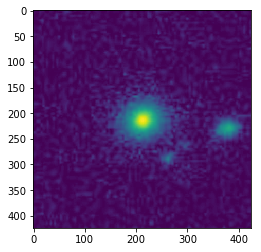

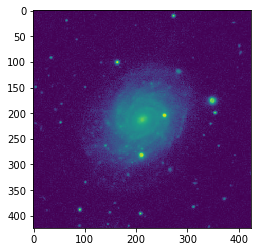

In [10]:
GALAXY_ORIG_FOLDER = './images_training_rev1/'

import cv2
img = cv2.imread(GALAXY_ORIG_FOLDER+'%d.jpg' % train_elliptical_id[0],0)
plt.imshow(img)
plt.show()
img = cv2.imread(GALAXY_ORIG_FOLDER+'%d.jpg' % train_sprial_id[0],0)
plt.imshow(img)
plt.show()